In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Stats Intro

In [2]:
heart_dataset = pd.read_csv("../datasets/heart.csv")    #importing heart dataset into a variable | Dataframe | ../ = current repo (PREDICTIONS)

In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_dataset.describe()   #statistics of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_dataset['target'].value_counts()    # count the number of heart disease and non heart disease patients

target
1    165
0    138
Name: count, dtype: int64

### Preprocessing of data

In [6]:
X = heart_dataset.drop(columns=['target'], axis=1)   # Stored dataframe in X axis except 'taregt' column
Y = heart_dataset['target']   # Stored outcomes in Y axis 

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Splitting Data for Training and Testing

In [9]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=111)  # Splitting Data

# UnderSampling (Imbalance Data)

In [10]:
# Define the undersampler
undersampler = RandomUnderSampler(random_state=111)

# Apply undersampling
X_train_undersampled, Y_train_undersampled = undersampler.fit_resample(X_train, Y_train)  #Resampled features (`X_resampled`) and target labels (`Y_resampled`).

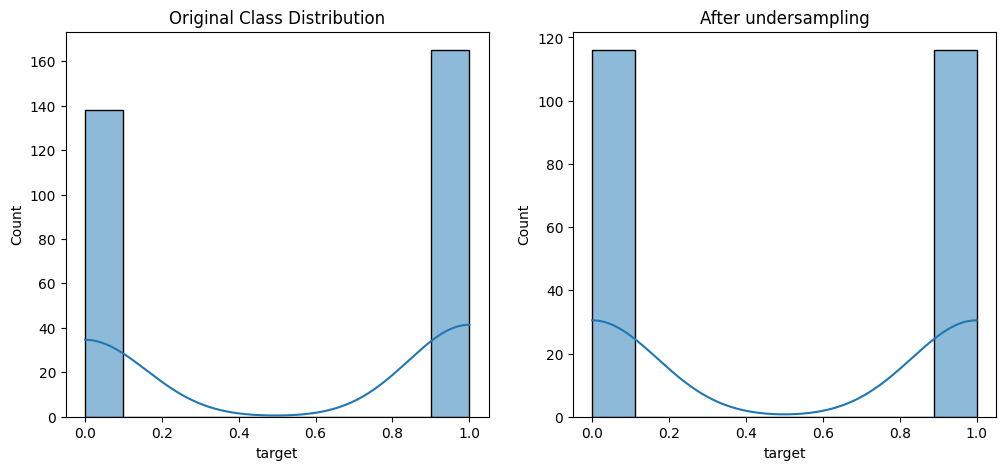

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(Y_train_undersampled, kde=True, ax=axes[1])
axes[1].set_title("After undersampling")

# Show the plots
plt.show()

In [12]:
X_train.shape

(242, 13)

In [13]:
X_test.shape

(61, 13)

###  SVM model (UnderSampled)

In [14]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_undersampled, Y_train_undersampled)  # Retrain with the resampled data


SVC(kernel='linear')

In [15]:
y_pred = model.predict(X_test)   

0.8852459016393442
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.90      0.92      0.91        39

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.89      0.88        61



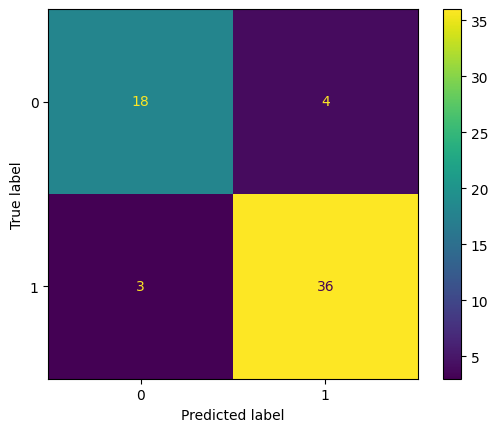

In [16]:
print(accuracy_score(Y_test,y_pred))

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Generate the classification report
report = classification_report(Y_test, y_pred)

# Print the report
print(report)


### Logistic Regression (UnderSampled)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_undersampled, Y_train_undersampled)

y_pred = model.predict(X_test)

0.9016393442622951
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.92      0.92      0.92        39

    accuracy                           0.90        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



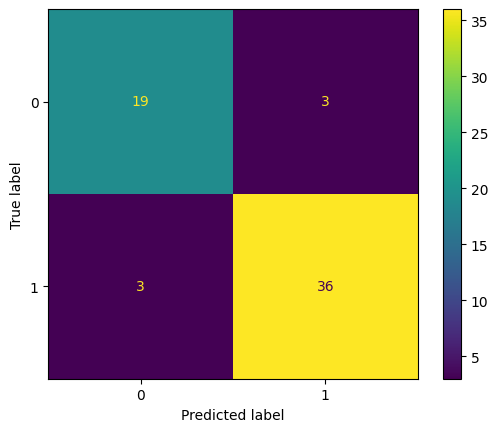

In [18]:
print(accuracy_score(Y_test,y_pred))

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Generate the classification report
report = classification_report(Y_test, y_pred)

# Print the report
print(report)

### Random Forest (UnderSampled)

In [19]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=111)

# Train the model
model.fit(X_train_undersampled, Y_train_undersampled)

RandomForestClassifier(random_state=111)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

0.8360655737704918
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.87      0.87      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.84      0.84      0.84        61



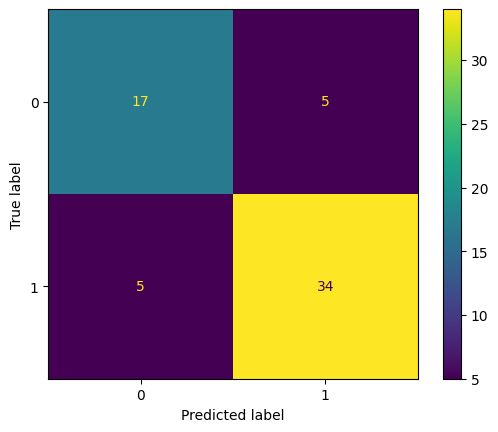

In [21]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(accuracy_score(Y_test,y_pred))
report = classification_report(Y_test, y_pred)
print(report)

## Tomek Link 

**as this dataset is not much imbalanced we'll apply `Tomek link` on Parent Dataset, Instead of Undersampled Dataset**

In [31]:
tomek_links = TomekLinks()
X_resampled, Y_resampled = tomek_links.fit_resample(X_train, Y_train) 

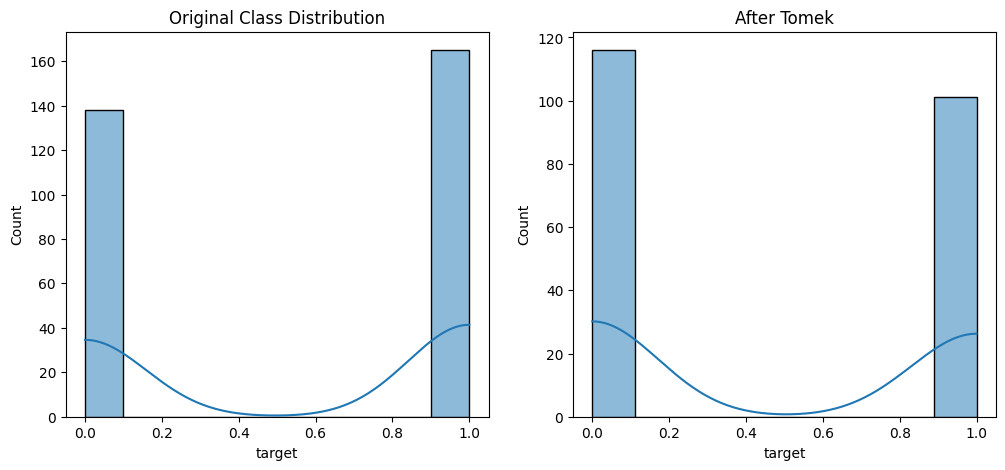

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(Y_resampled, kde=True, ax=axes[1])
axes[1].set_title("After Tomek")

# Show the plots
plt.show()

**using tomek link is overfitting the minor class, so we'll not use tomek**

# OverSampling 

In [24]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Oversample minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train) # Oversam Data

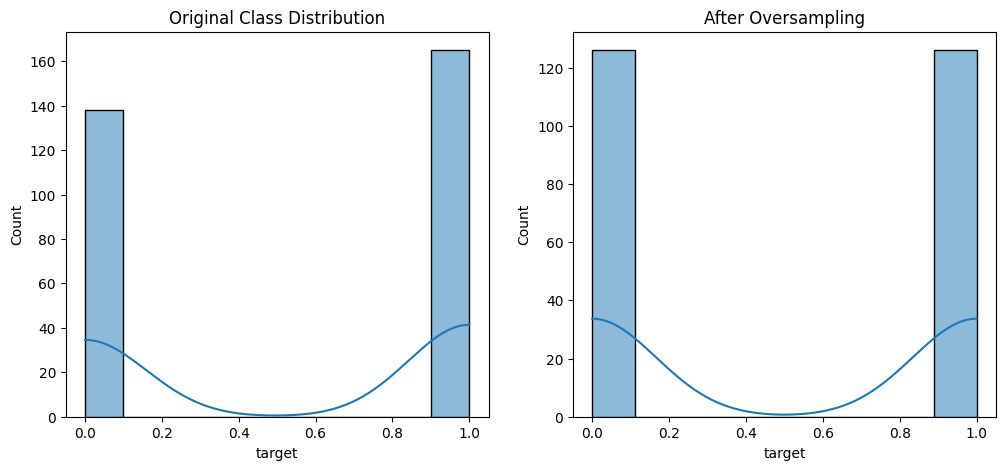

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(y_train_smote, kde=True, ax=axes[1])
axes[1].set_title("After Oversampling")

# Show the plots
plt.show()

### Random Forest (Oversampled) 

In [26]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)


report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.87      0.87      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.84      0.84      0.84        61



### Logistic Regression (Oversampled)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.90      0.92      0.91        39

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.89      0.88        61



### SVM (OverSampled)

In [28]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_smote, y_train_smote)  # Retrain with the resampled data

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.88      0.95      0.91        39

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61



## Final Model ✅

### SVM (Oversampled) ✅
**Choose SVM with oversampling because it achieves the highest recall (95%), minimizing missed diabetic cases while maintaining strong overall performance**

In [29]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_smote, y_train_smote)  # Retrain with the resampled data

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.88      0.95      0.91        39

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61



In [30]:
import pickle   # pickle serialize or desiralize python objects and save them in file
filename = "heart_model.sav"  # .sav is used for saving models
pickle.dump(model, open(filename, 'wb'))   # open(filename, 'wb') opens the file in write-binary mode (wb). This mode allows the byte stream generated by pickle.dump() to be written to the file
